In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten
import pandas as pd


In [ ]:
from tensorflow.keras.preprocessing .image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train=train_datagen.flow_from_directory(r"C:\Users\HP\Desktop\dgi naturalist\datasets\New\traindata",target_size = (64,64),batch_size = 32,class_mode = "categorical")
x_test=test_datagen.flow_from_directory(r"C:\Users\HP\Desktop\dgi naturalist\datasets\New\testdata",target_size = (64,64),batch_size = 32,class_mode = "categorical")

Found 8305 images belonging to 9 classes.
Found 900 images belonging to 9 classes.


In [ ]:
x_train.class_indices

{'ANTBIRD': 0,
 'PEACOCK': 1,
 'WILD TURKEY': 2,
 'gatto': 3,
 'mucca': 4,
 'pecora': 5,
 'rose': 6,
 'sunflower': 7,
 'tulip': 8}

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape = (64,64,3)))

In [ ]:
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units = 128, kernel_initializer= "random_uniform",activation = "relu"))

In [ ]:
model.add(Dense(units = 9, kernel_initializer= "random_uniform",activation = "softmax"))

In [ ]:
model.compile(optimizer= "rmsprop",loss = "categorical_crossentropy" , metrics =["accuracy"])

In [ ]:
model.fit_generator(x_train,steps_per_epoch =251 ,epochs = 10, validation_data = x_test,validation_steps =28 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
251/251 [==============================] - 46s 183ms/step - loss: 1.4640 - accuracy: 0.4863 - val_loss: 1.7072 - val_accuracy: 0.4576
Epoch 2/10
251/251 [==============================] - 48s 189ms/step - loss: 1.1720 - accuracy: 0.5759 - val_loss: 1.1751 - val_accuracy: 0.5804
Epoch 3/10
251/251 [==============================] - 48s 190ms/step - loss: 1.0728 - accuracy: 0.6103 - val_loss: 1.1711 - val_accuracy: 0.6083
Epoch 4/10
251/251 [==============================] - 47s 189ms/step - loss: 1.0126 - accuracy: 0.6280 - val_loss: 1.1734 - val_accuracy: 0.6373
Epoch 5/10
251/251 [==============================] - 47s 188ms/step - loss: 0.9424 - accuracy: 0.6611 - val_loss: 1.0177 - val_accuracy: 0.6652
Epoch 6/10
251/251 [==============================] - 48s 191ms/step - loss: 0.8878 - accuracy: 0.6788 - val_loss: 1.1062 - val_accuracy: 0.6708
Epoch 7/10
251/251 [==============================] - 

In [ ]:
model.save("natur1.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model("./natur1.h5")

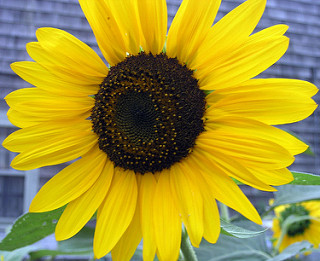

In [ ]:
from IPython.display import Image
img=Image(filename=r"C:\Users\HP\Desktop\dgi naturalist\datasets\New\traindata\sunflower\sunf.jpg")
img

In [ ]:
from tensorflow.keras.preprocessing  import image
path2=r"C:\Users\HP\Desktop\dgi naturalist\datasets\New\traindata\sunflower\sunf.jpg"

img = image.load_img(path2,target_size = (64,64))


In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x = image.img_to_array(img)


In [ ]:
x.shape

(64, 64, 3)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x = np.expand_dims(x,axis = 0)
x.shape

(1, 64, 64, 3)

In [ ]:
pred = np.argmax(model.predict(x))
pred

7

In [ ]:
model.predict(x)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)